In [3]:
!pip install hvplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 155.4/155.4 kB 1.2 MB/s eta 0:00:00


In [4]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import hvplot.pandas
import seaborn as sns

In [5]:
#Load Dataset
df=pd.read_csv("heart.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [8]:
df.shape

(1025, 14)

In [9]:
#Feature Engineering
#1st we'll check is there any null values and '0' indicate no null values
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
df.target.value_counts().hvplot.bar(
    title="Heart Disease Count", xlabel='Heart Disease', ylabel='Count',
    width=500, height=350
)

:Bars   [target]   (count)

In [11]:
#Evaluating according to sex
with_disease = df.loc[df['target']==1, 'sex'].value_counts().hvplot.bar(alpha=0.4)
without_disease = df.loc[df['target']==0, 'sex'].value_counts().hvplot.bar(alpha=0.4)

(without_disease * with_disease).opts(
    title="Heart Disease by Sex", xlabel='Sex', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [sex]   (count)
   .Bars.Count.II :Bars   [sex]   (count)

In [12]:
with_disease = df.loc[df['target']==1, 'cp'].value_counts().hvplot.bar(alpha=0.4)
without_disease = df.loc[df['target']==0, 'cp'].value_counts().hvplot.bar(alpha=0.4)

(without_disease * with_disease).opts(
    title="Heart Disease by Chest Pain Type", xlabel='Chest Pain Type', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [cp]   (count)
   .Bars.Count.II :Bars   [cp]   (count)

In [13]:
hwith_disease = df.loc[df['target']==1, 'fbs'].value_counts().hvplot.bar(alpha=0.4)
without_disease = df.loc[df['target']==0, 'fbs'].value_counts().hvplot.bar(alpha=0.4)

(without_disease * with_disease).opts(
    title="Heart Disease by fasting blood sugar", xlabel='fasting blood sugar > 120 mg/dl (1 = true; 0 = false)',
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [fbs]   (count)
   .Bars.Count.II :Bars   [cp]   (count)

In [14]:
with_disease = df.loc[df['target']==1, 'restecg'].value_counts().hvplot.bar(alpha=0.4)
without_disease = df.loc[df['target']==0, 'restecg'].value_counts().hvplot.bar(alpha=0.4)

(without_disease * without_disease).opts(
    title="Heart Disease by resting electrocardiographic results", xlabel='resting electrocardiographic results',
    ylabel='Count', width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Count.I  :Bars   [restecg]   (count)
   .Bars.Count.II :Bars   [restecg]   (count)

In [15]:
categorical_val = []
continous_val = []
for column in df.columns:
    if len(df[column].unique()) <= 10:
        categorical_val.append(column)
    else:
        continous_val.append(column)

In [16]:
categorical_val

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

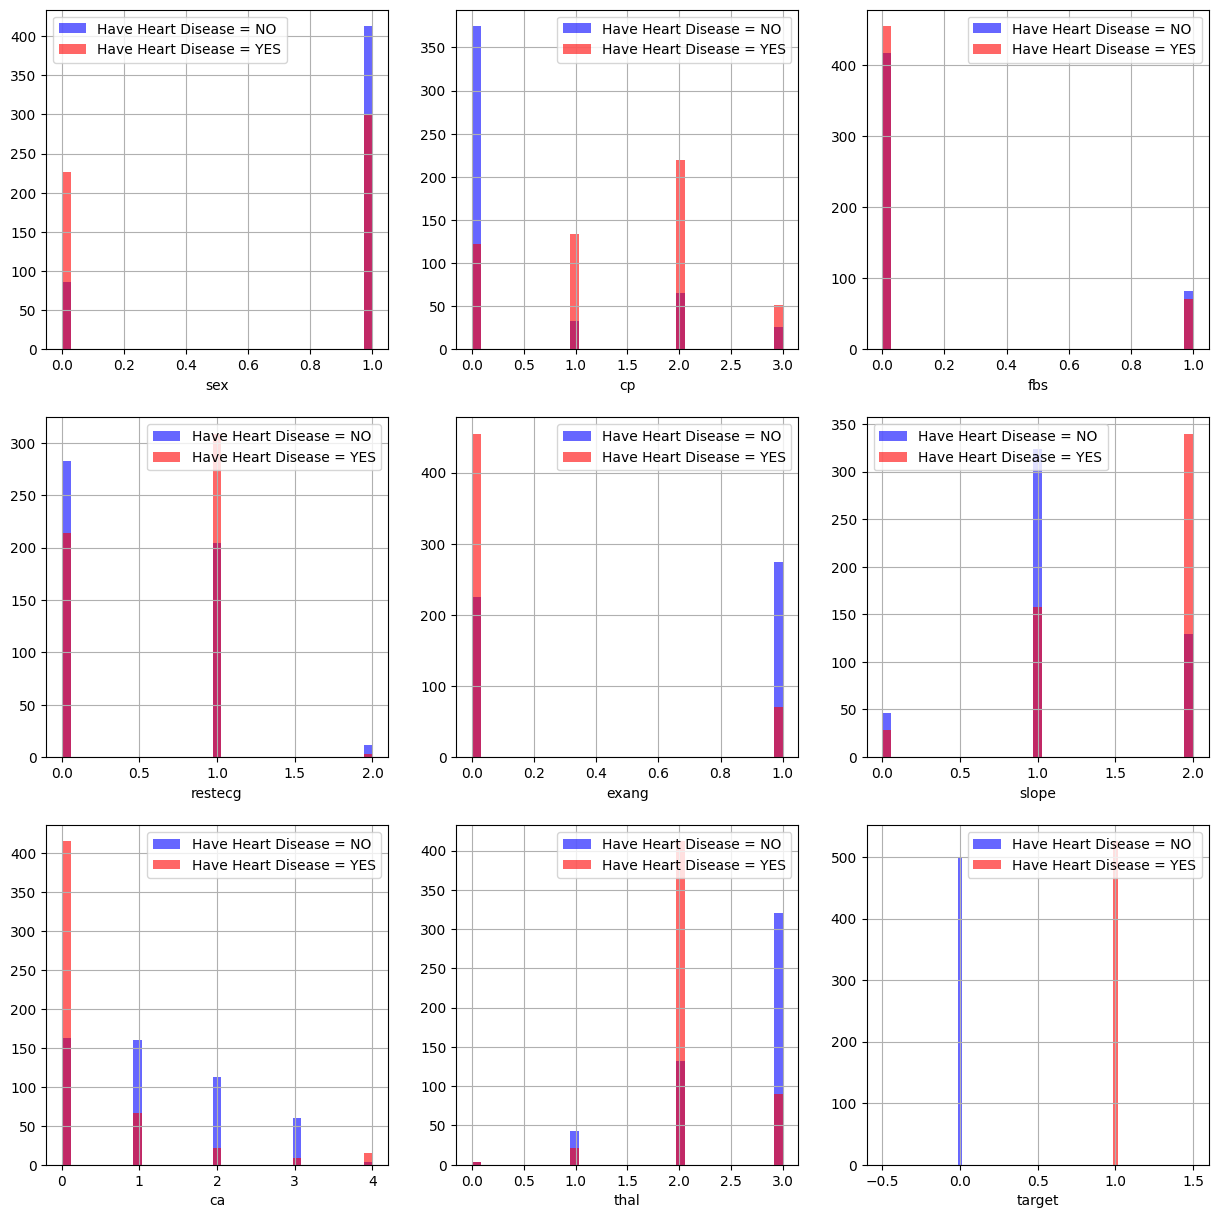

In [17]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

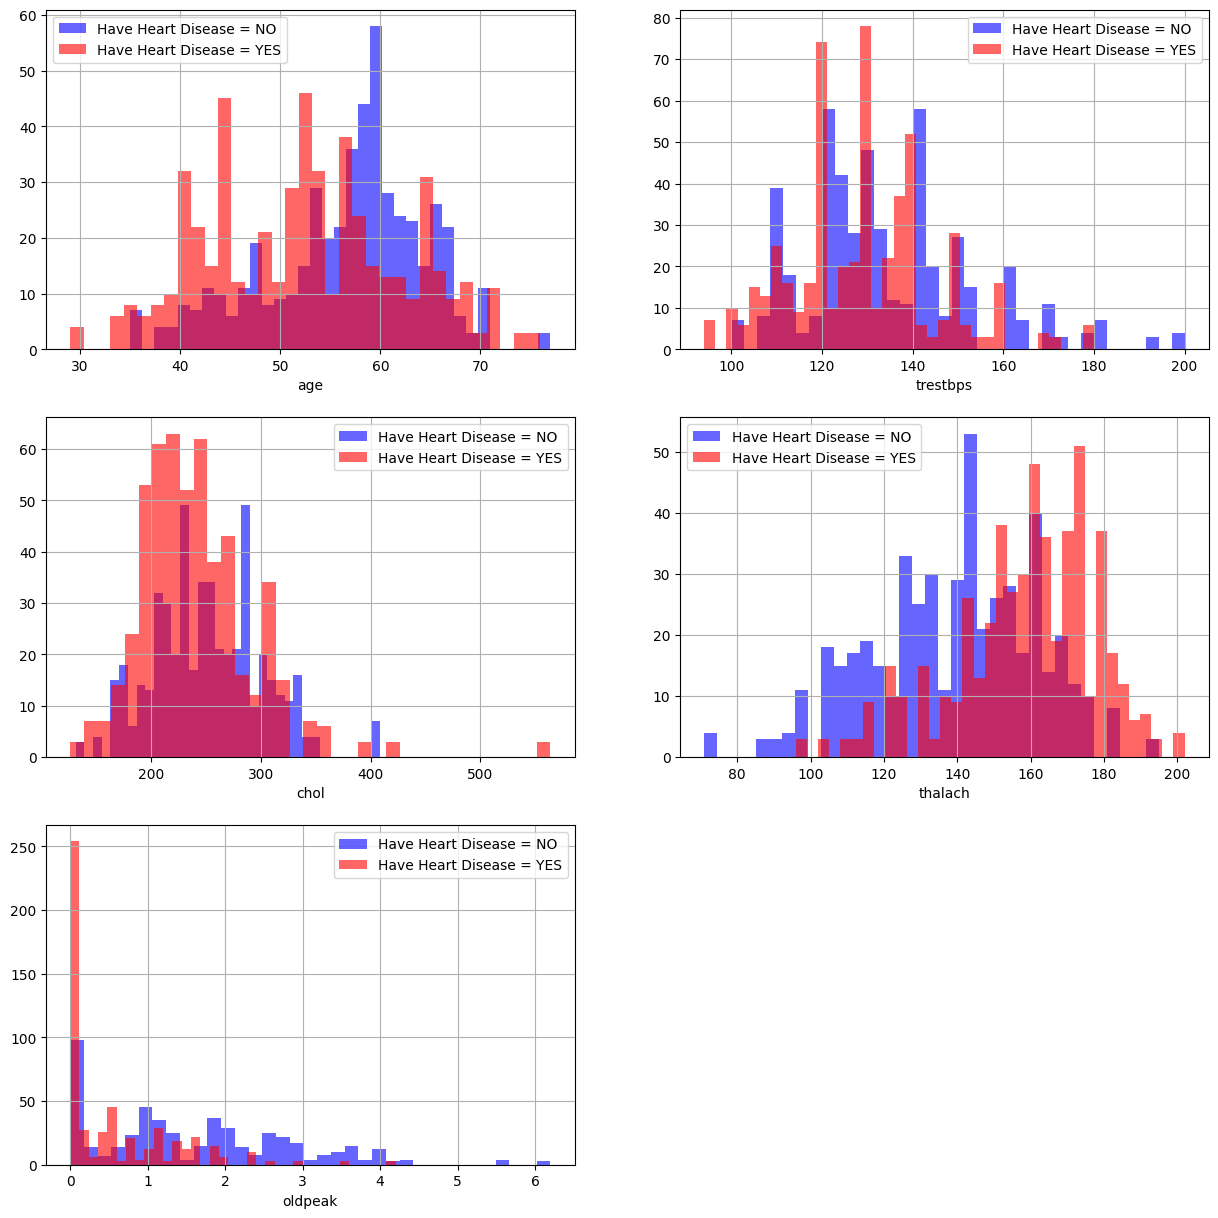

In [18]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

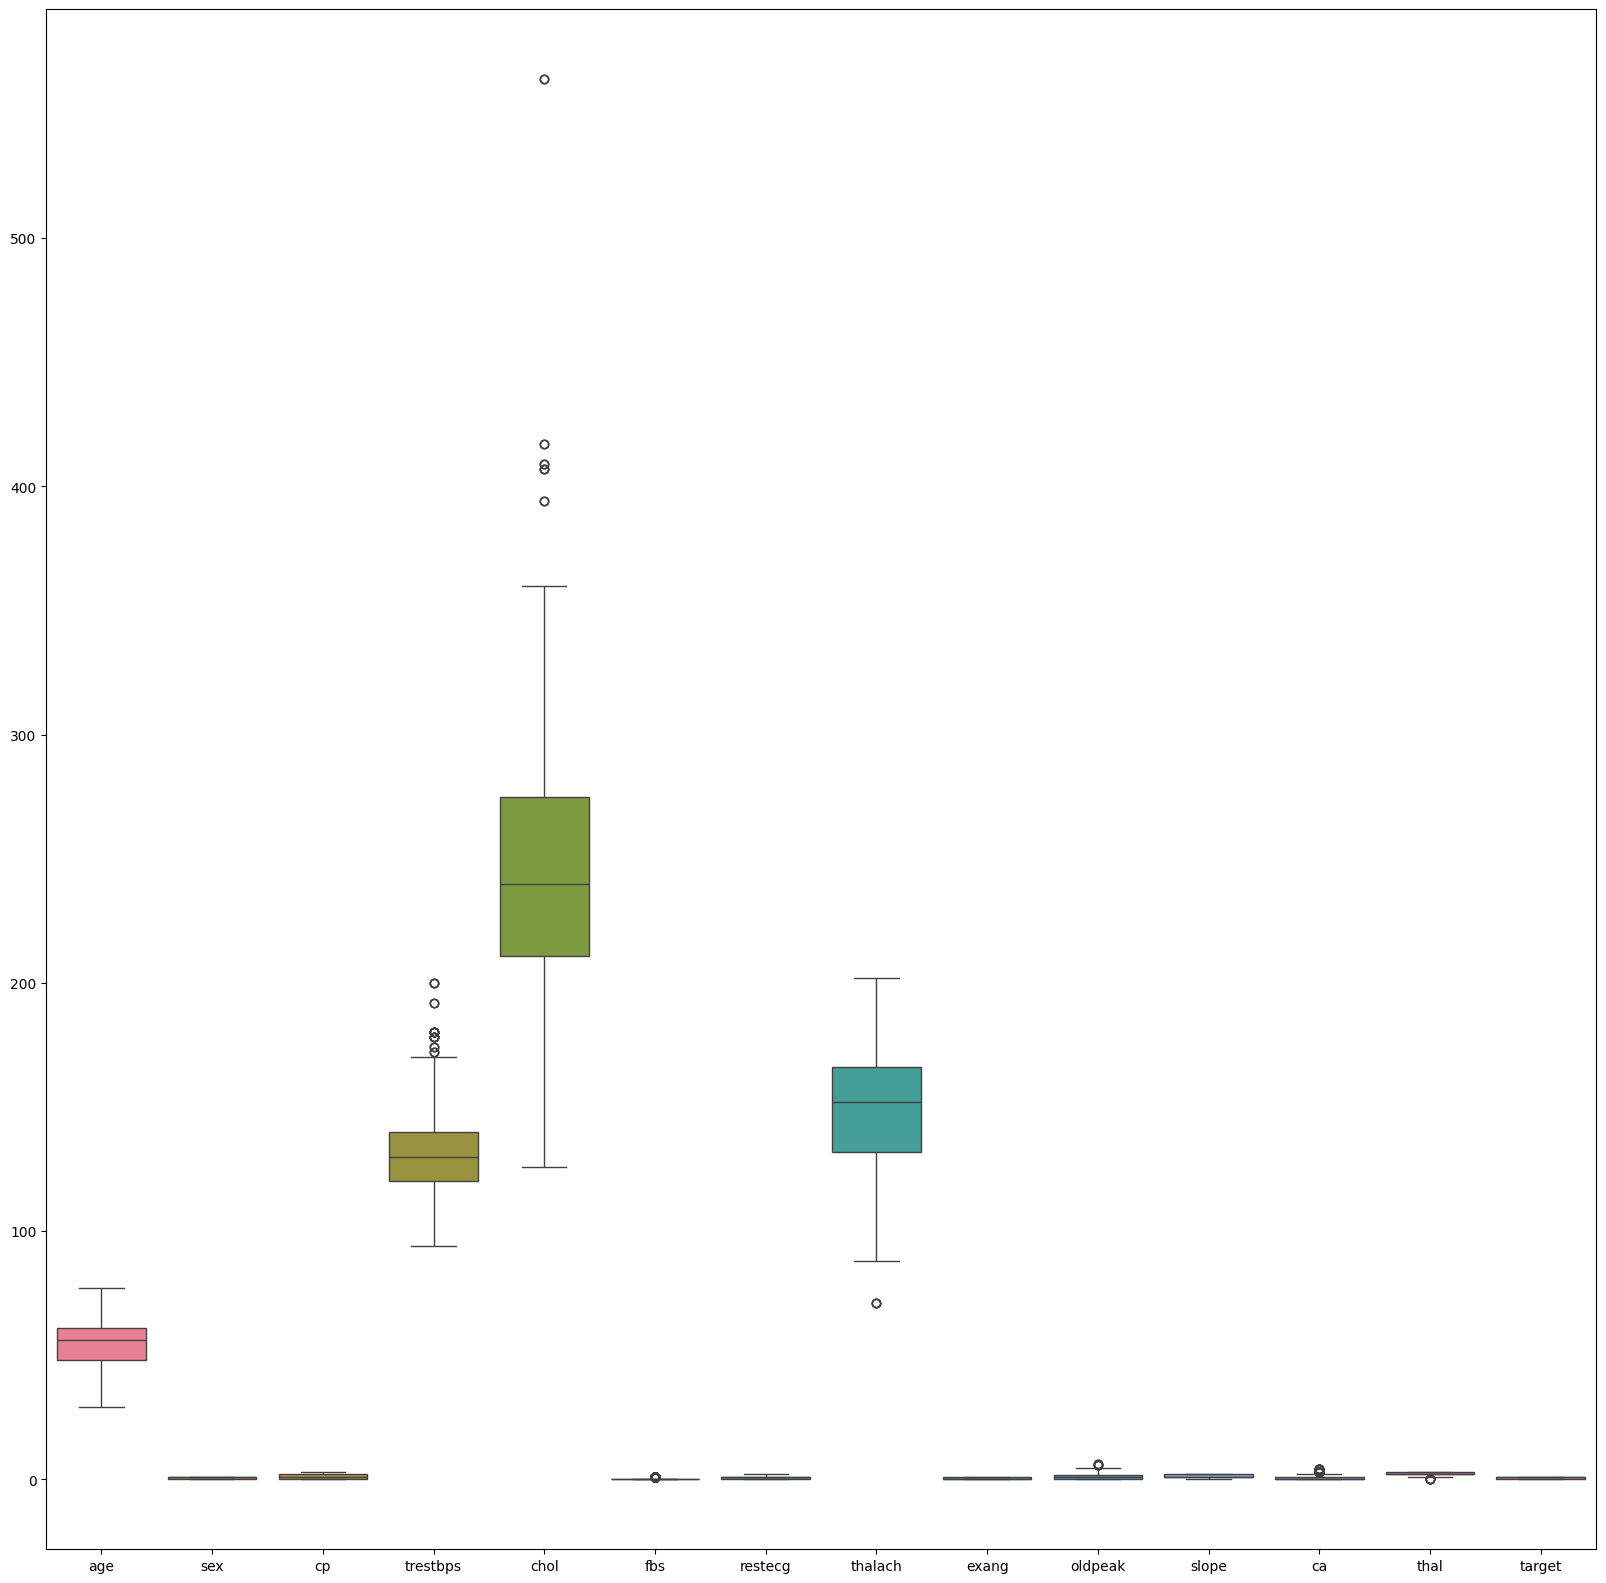

In [19]:
#after checking null values we'll check outliers in the dataset
plt.figure(figsize=(20,20))
ax=sns.boxplot(data=df)

In [20]:
 #Here we'll read and remove outlier's in the dataset using zscore matrix
from scipy import stats
z=np.abs(stats.zscore(df))
print(z)

           age       sex        cp  trestbps      chol       fbs   restecg  \
0     0.268437  0.661504  0.915755  0.377636  0.659332  0.418878  0.891255   
1     0.158157  0.661504  0.915755  0.479107  0.833861  2.387330  1.004049   
2     1.716595  0.661504  0.915755  0.764688  1.396233  0.418878  0.891255   
3     0.724079  0.661504  0.915755  0.936037  0.833861  0.418878  0.891255   
4     0.834359  1.511706  0.915755  0.364875  0.930822  2.387330  0.891255   
...        ...       ...       ...       ...       ...       ...       ...   
1020  0.503520  0.661504  0.055931  0.479107  0.484803  0.418878  0.891255   
1021  0.613800  0.661504  0.915755  0.377636  0.232705  0.418878  1.004049   
1022  0.819834  0.661504  0.915755  1.234378  0.562371  0.418878  1.004049   
1023  0.488996  1.511706  0.915755  1.234378  0.155137  0.418878  1.004049   
1024  0.047877  0.661504  0.915755  0.663216  1.124743  0.418878  0.891255   

       thalach     exang   oldpeak     slope        ca      tha

In [21]:
threshold=3
# here we'll print z whose greater than third deviation
print(np.where(z > 3)) #The first array contains the list of row numbers and second array contains respective col

(array([ 14,  52,  54,  55,  69,  83, 123, 128, 151, 158, 175, 179, 192,
       208, 242, 246, 267, 290, 294, 296, 319, 326, 329, 340, 348, 359,
       378, 393, 417, 428, 450, 464, 465, 481, 508, 521, 526, 559, 597,
       613, 641, 665, 685, 686, 688, 734, 743, 749, 831, 833, 889, 893,
       958, 970, 993, 996]), array([12, 11,  9,  9,  9, 11,  4, 11,  3,  4,  3,  4,  4, 11, 11,  3,  7,
       11,  3,  7, 12,  3, 12, 11, 11, 12,  7,  9, 11, 11,  4,  4, 11,  4,
        3, 11,  9,  7, 11,  9,  4,  4,  4, 12,  3, 12, 11, 11, 11,  9,  4,
       12,  4, 11, 11,  4]))


In [22]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3 - Q1
print(IQR)

age         13.0
sex          1.0
cp           2.0
trestbps    20.0
chol        64.0
fbs          0.0
restecg      1.0
thalach     34.0
exang        1.0
oldpeak      1.8
slope        1.0
ca           1.0
thal         1.0
target       1.0
dtype: float64


In [23]:
df = df[(z < 3).all(axis=1)]
df.shape #set the lower bound

(969, 14)

In [24]:
df=df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape #set the upper bound

(769, 14)

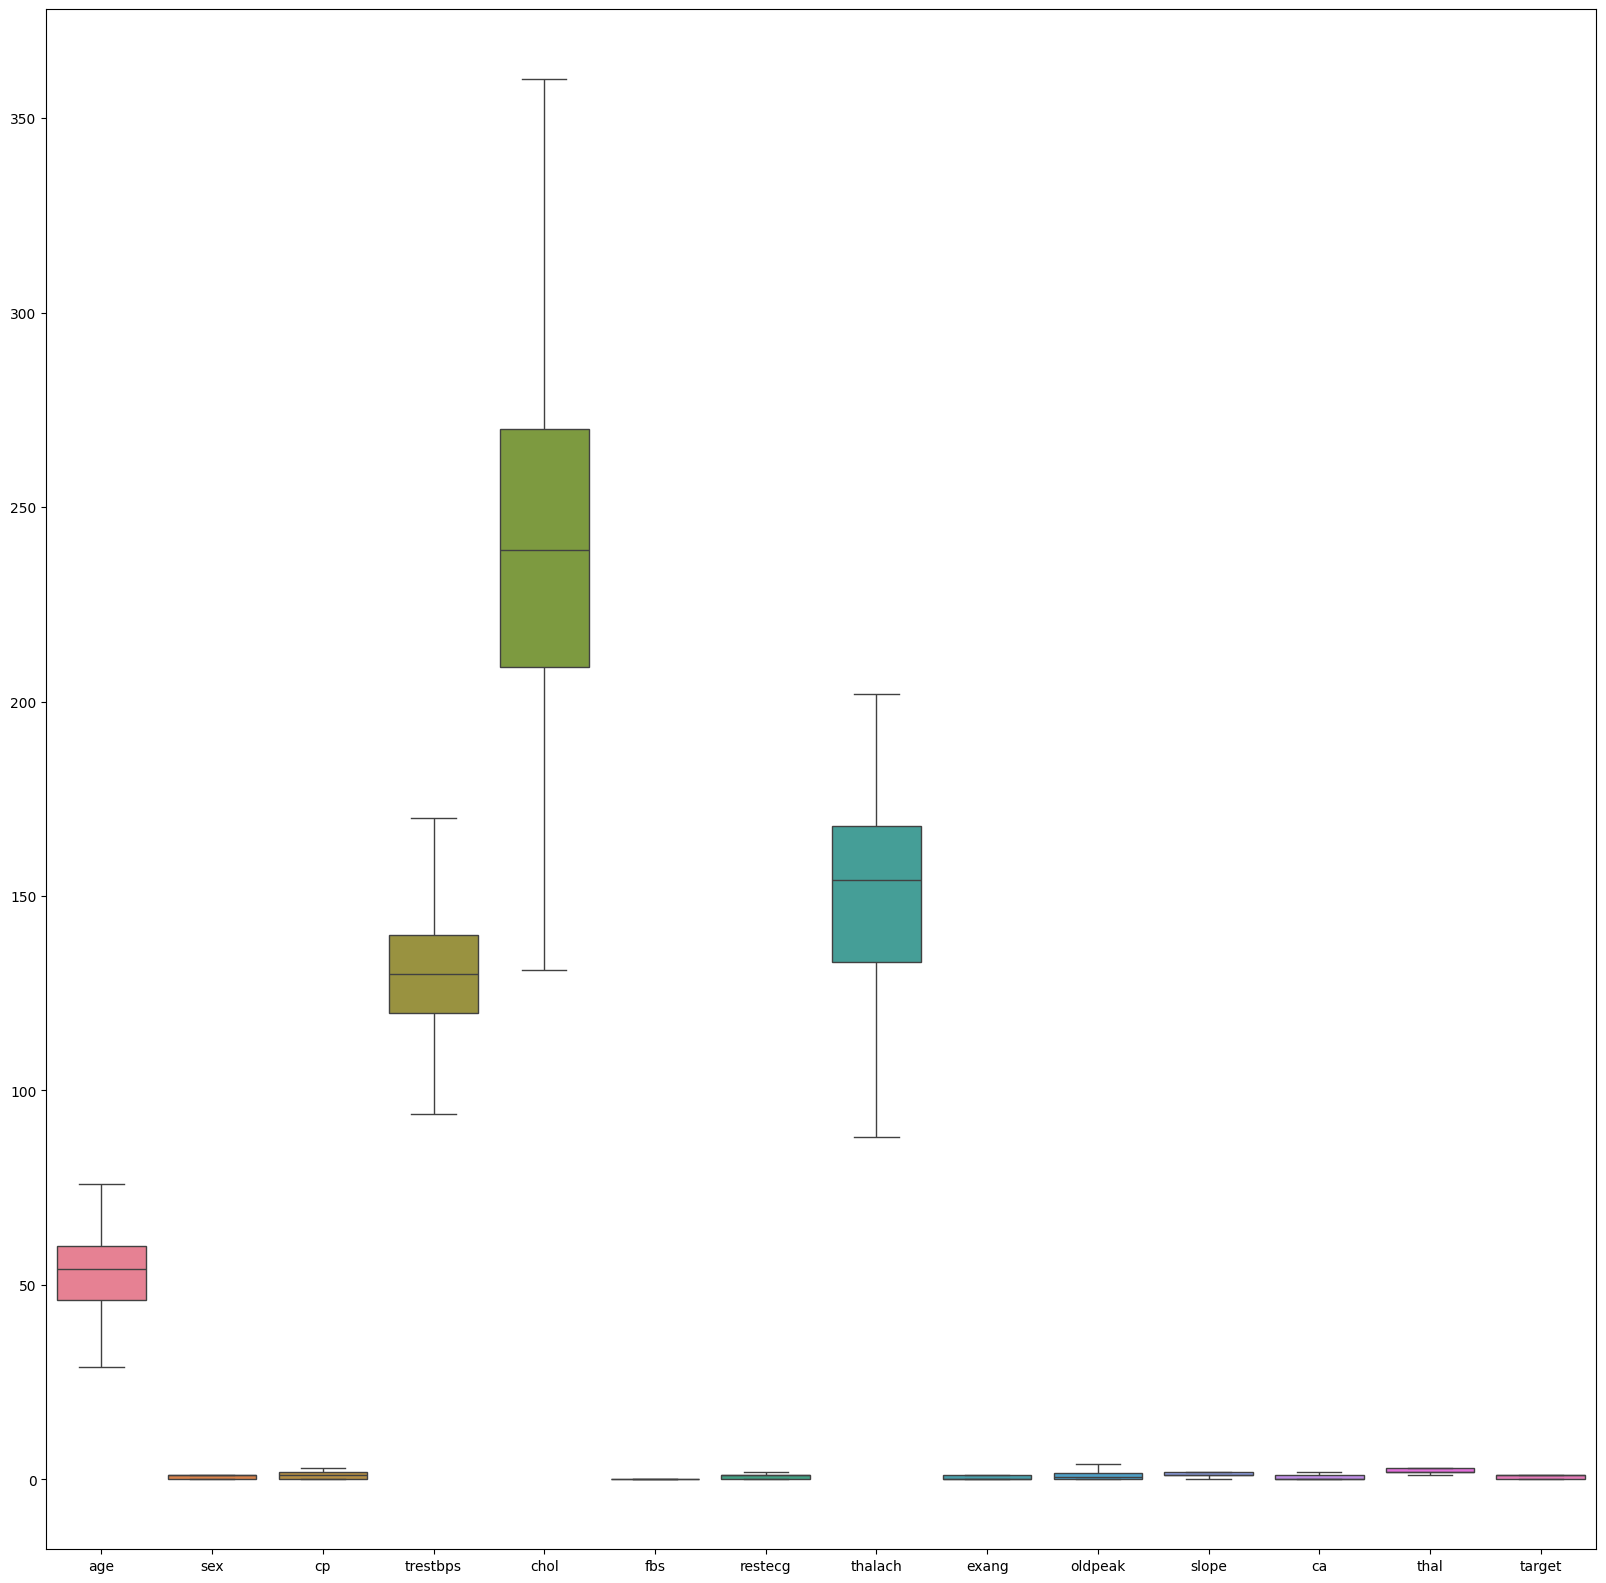

In [25]:
#To check whether the outlier's are removed
plt.figure(figsize=(20,20))
ax= sns.boxplot(data=df)

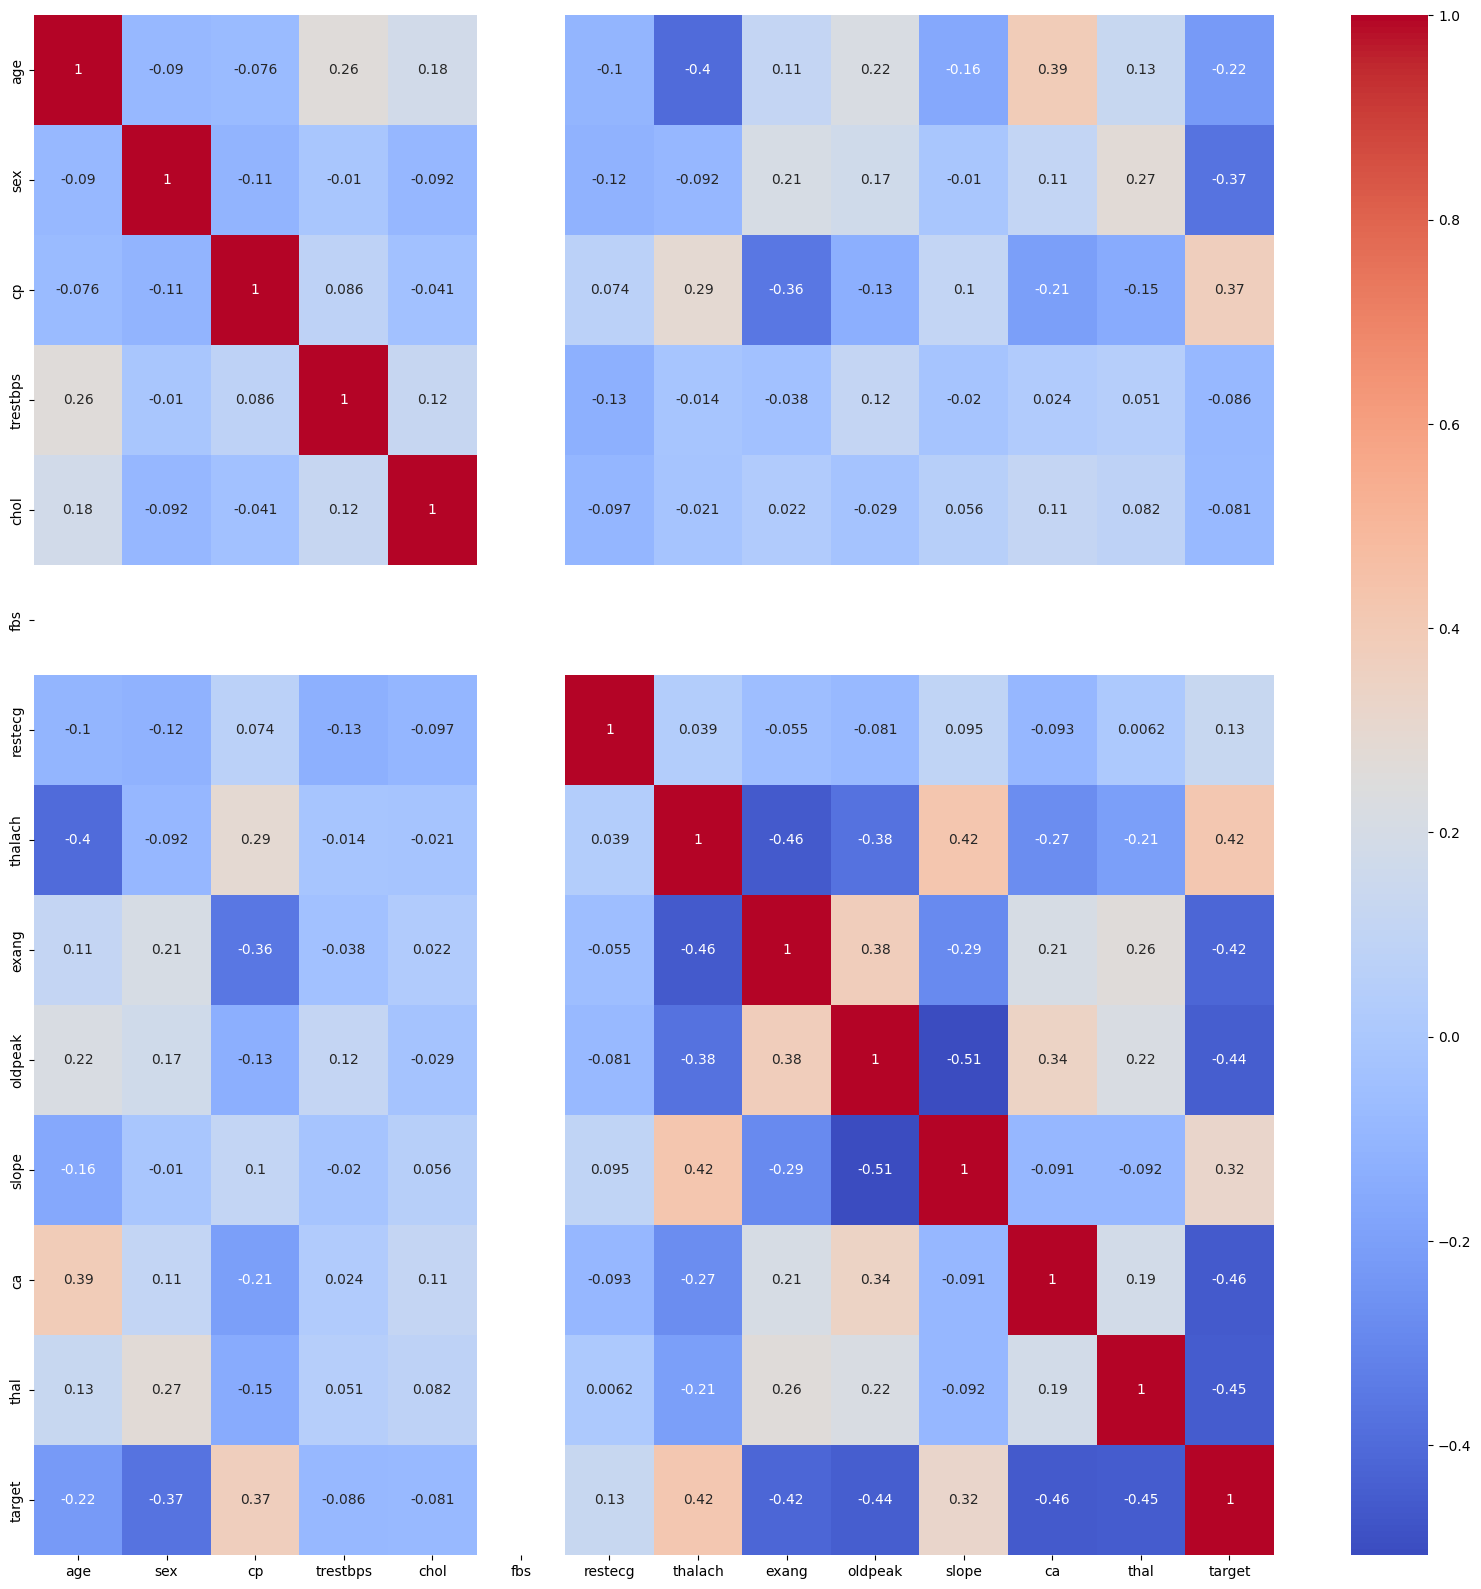

In [26]:
#feature Selection
plt.figure(figsize=(20,20))
d= sns.heatmap(df.corr(),cmap="coolwarm",annot=True)
# red->+ve coorelation,blue->-ve coorelation ,skyblue->0 coorelation

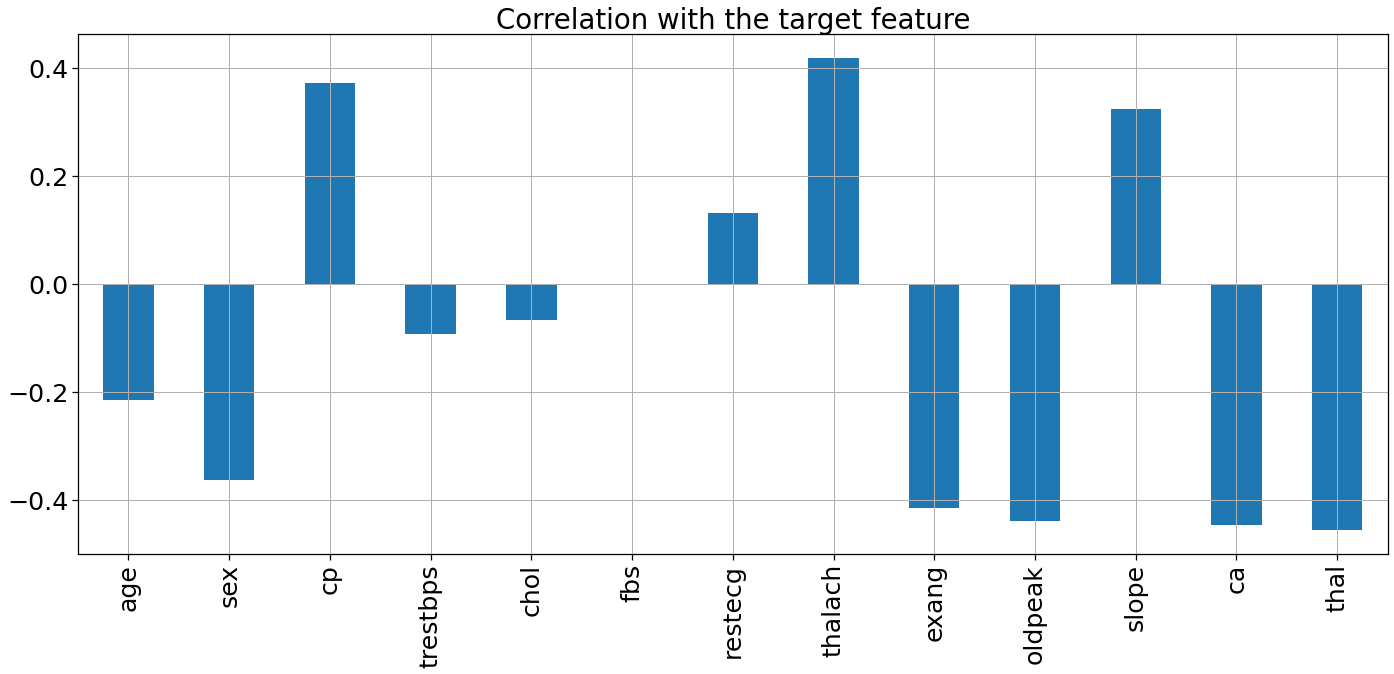

In [ ]:
sns.set_context('notebook',font_scale = 2.3)
df.drop('target', axis=1).corrwith(df.target).plot(kind='bar', grid=True, figsize=(20, 10),
                                                        title="Correlation with the target feature")
plt.tight_layout()

In [27]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,769.000000,769.000000,769.000000,769.000000,769.000000,769.0,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000,769.000000
mean,53.431730,0.691808,0.924577,128.685306,242.075423,0.0,0.551365,150.669701,0.323797,0.972432,1.438231,0.495449,2.331599,0.548765
std,9.225098,0.462047,1.019105,15.314066,44.521145,0.0,0.515667,22.567898,0.468228,1.050258,0.589973,0.705479,0.568764,0.497940
min,29.000000,0.000000,0.000000,94.000000,131.000000,0.0,0.000000,88.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,46.000000,0.000000,0.000000,120.000000,209.000000,0.0,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,54.000000,1.000000,1.000000,130.000000,239.000000,0.0,1.000000,154.000000,0.000000,0.600000,1.000000,0.000000,2.000000,1.000000
75%,60.000000,1.000000,2.000000,140.000000,270.000000,0.0,1.000000,168.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,76.000000,1.000000,3.000000,170.000000,360.000000,0.0,2.000000,202.000000,1.000000,4.000000,2.000000,2.000000,3.000000,1.000000


In [28]:
#Feature Scalling
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()
dataset = pd.get_dummies(df,columns=['sex','cp','fbs','restecg','exang','slope','ca','thal']) #creating my dummy variable
columns_to_scale= ['age','trestbps','chol','thalach','oldpeak'] # we have taken these columns for scale down
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [29]:
dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
0,-0.155300,-0.240805,-0.675971,0.768418,0.026266,0,False,True,True,False,...,False,False,False,True,False,False,True,False,False,True
2,1.797168,1.066034,-1.530053,-1.138183,1.550693,0,False,True,True,False,...,True,True,False,False,True,False,False,False,False,True
3,0.820934,1.262060,-0.878254,0.458041,-0.926501,0,False,True,True,False,...,False,False,False,True,False,True,False,False,False,True
5,0.495523,-1.874354,0.133160,-1.271202,0.026266,1,True,False,True,False,...,False,False,True,False,True,False,False,False,True,False
7,0.170111,2.046163,1.054670,-0.251392,-0.164287,0,False,True,True,False,...,True,False,True,False,False,True,False,False,False,True


In [30]:
dataset.tail() #we have choosen data from bottom

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,exang_1,slope_0,slope_1,slope_2,ca_0,ca_1,ca_2,thal_1,thal_2,thal_3
1020,0.603993,0.739324,-0.473688,0.591060,-0.926501,1,False,True,False,True,...,True,False,False,True,True,False,False,False,True,False
1021,0.712463,-0.240805,0.357919,-0.428750,1.741247,0,False,True,True,False,...,True,False,True,False,False,True,False,False,False,True
1022,-0.697653,-1.220934,0.740008,-1.448560,0.026266,0,False,True,True,False,...,True,False,True,False,False,True,False,False,True,False
1023,-0.372241,-1.220934,0.268015,0.369362,-0.926501,1,True,False,True,False,...,False,False,False,True,True,False,False,False,True,False
1024,0.061641,-0.567515,-1.215391,-1.670258,0.407373,0,False,True,True,False,...,False,False,True,False,False,True,False,False,False,True


In [31]:
dataset.describe()

,age,trestbps,chol,thalach,oldpeak,target
count,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,7.690000e+02,769.000000
mean,2.633351e-16,8.177247e-16,2.437005e-16,-4.804710e-16,6.929871e-17,0.548765
std,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,1.000651e+00,0.497940
min,-2.650122e+00,-2.266405e+00,-2.496515e+00,-2.778747e+00,-9.265009e-01,0.000000
25%,-8.061233e-01,-5.675147e-01,-7.433984e-01,-7.834669e-01,-9.265009e-01,0.000000
50%,6.164057e-02,8.590468e-02,-6.912276e-02,1.476640e-01,-3.548407e-01,1.000000
75%,7.124635e-01,7.393241e-01,6.276288e-01,7.684180e-01,5.979264e-01,1.000000
max,2.447991e+00,2.699582e+00,2.650456e+00,2.275963e+00,2.884567e+00,1.000000


In [32]:
#visualization
sns.pairplot(df,hue="target",height=3,aspect=1);

Output hidden; open in https://colab.research.google.com to view.

In [33]:
#model selection
y= dataset['target']
x= dataset.drop(['target'],axis=1)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=5)

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [37]:
#K - Nearest Neighbor classifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5)
knn_classifier.fit(x_train,y_train)
score = cross_val_score(knn_classifier,x_train,y_train,cv=10)
y_pred_knn=knn_classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.8506493506493507

In [38]:
score.mean()

0.8455843469063987

In [39]:
#hyper parameter tunning
knn_classifier = KNeighborsClassifier(algorithm='auto',leaf_size=30,metric='minkowski',
                                      metric_params=None, n_jobs=1,n_neighbors=5,p=1,weights='uniform')
knn_classifier.fit(x_train,y_train)
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
y_pred_knn=knn_classifier.predict(x_test)
accuracy_score(y_test,y_pred_knn)
#hence accuracy increases after Hyper parameter tunning


0.8701298701298701

In [40]:
score=cross_val_score(knn_classifier,x_train,y_train,cv=10)
score.mean()

0.8520624008461131

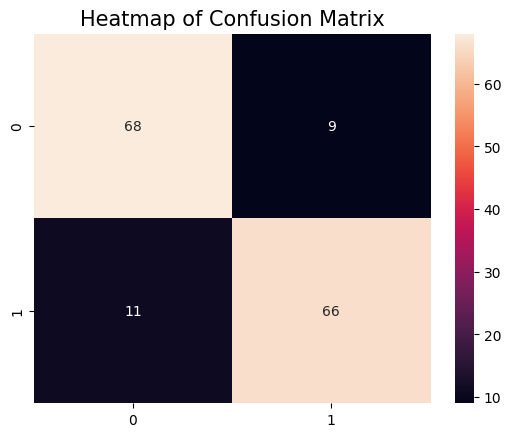

In [41]:
#confusion Metrix using heatmap
cm=confusion_matrix(y_test,y_pred_knn)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(cm,annot=True)
plt.show()

In [42]:
#printing the classification report
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87        77
           1       0.88      0.86      0.87        77

    accuracy                           0.87       154
   macro avg       0.87      0.87      0.87       154
weighted avg       0.87      0.87      0.87       154



In [43]:
# Random Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20 , criterion = 'entropy', random_state=51)
rf_classifier.fit(x_train,y_train)
y_pred_rf = rf_classifier.predict(x_test)
accuracy_score(y_test,y_pred_rf)

0.9805194805194806

In [44]:
score=cross_val_score(rf_classifier,x_train,y_train,cv=10)
score.mean()

0.990269698572184

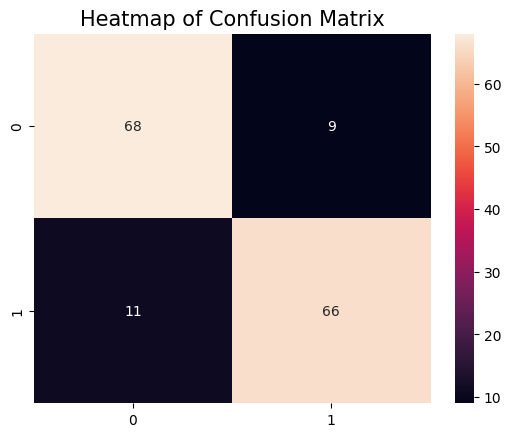

In [45]:
#confusion Metrix using heatmap
rf=confusion_matrix(y_test,y_pred_knn)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(rf,annot=True)
plt.show()

In [56]:
#XG BOOST
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.4, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=1, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=23,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
xgb_classifier.fit(x_train, y_train)
y_pred_xgb = xgb_classifier.predict(x_test)
accuracy_score(y_test, y_pred_xgb)

1.0

In [57]:
score=cross_val_score(xgb_classifier,x_train,y_train,cv=10)
score.mean()


0.9935219460602855

In [ ]:
#Ada Boosting With random forest
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100), n_estimators=100)
ada_clf.fit(x_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier(), n_estimators=100)

In [ ]:
y_pred_adb = ada_clf.predict(x_test)
accuracy_score(y_test, y_pred_adb)

0.9347826086956522

In [ ]:
score=cross_val_score(ada_clf,x_train,y_train,cv=10)
score.mean()

0.7906432748538011

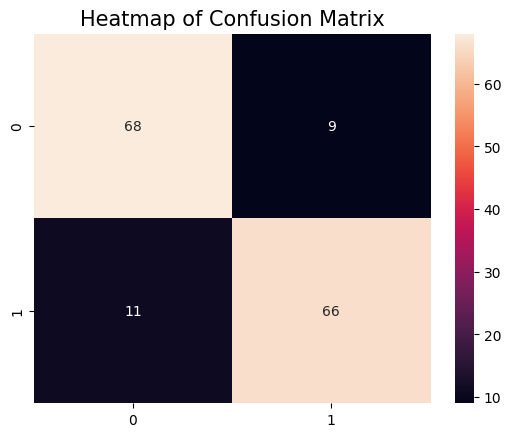

In [48]:
#confusion Metrix using heatmap
ada=confusion_matrix(y_test,y_pred_knn)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(ada,annot=True)
plt.show()

In [49]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(x_train, y_train)

GradientBoostingClassifier()

In [50]:
y_pred_adb = gbc_clf.predict(x_test)
accuracy_score(y_test, y_pred_adb)

0.9805194805194806

In [51]:
score=cross_val_score(gbc_clf,x_train,y_train,cv=10)
score.mean()

0.9918561607615018

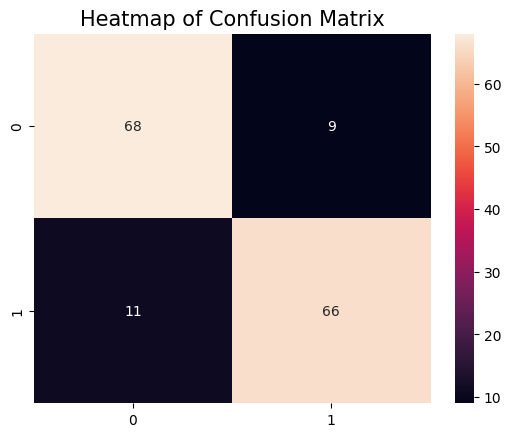

In [52]:
#confusion Metrix using heatmap
gbc=confusion_matrix(y_test,y_pred_knn)
plt.title('Heatmap of Confusion Matrix',fontsize=15)
sns.heatmap(gbc,annot=True)
plt.show()

In [53]:
## Pickle
from xgboost import XGBClassifier
import pickle
import joblib

'''
filename='heart'
pickle.dump(knn_classifier,open(filename,'wb'))

# save model
#pickle.dump(knn_classifier, open('model.pkl', 'wb'))

# load model
Heart_disease_detector_model = pickle.load(open(filename,'rb'))

# predict the output
y_pred = Heart_disease_detector_model.predict(x_test)

# confusion matrix
print('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))'''


"\nfilename='heart'\npickle.dump(knn_classifier,open(filename,'wb'))\n\n# save model\n#pickle.dump(knn_classifier, open('model.pkl', 'wb'))\n\n# load model\nHeart_disease_detector_model = pickle.load(open(filename,'rb'))\n\n# predict the output\ny_pred = Heart_disease_detector_model.predict(x_test)\n\n# confusion matrix\nprint('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')\n\n# show the accuracy\nprint('Accuracy of K – Nearest Neighbor  model = ',accuracy_score(y_test, y_pred))"

In [60]:
import pickle
import joblib
# saving our model # model - model , filename-model_jlib
joblib.dump(rf_classifier, 'model_jlib')


# opening the file- model_jlib
Heart_disease_detector_model = joblib.load('model_jlib')

# predict the output
y_pred = Heart_disease_detector_model.predict(x_test)

# confusion matrix
# print('Confusion matrix of K – Nearest Neighbor model: \n',confusion_matrix(y_test, y_pred),'\n')
print('Confusion matrix of Random Forest: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of Random Forest model = ',accuracy_score(y_test, y_pred))



Confusion matrix of Random Forest: 
 [[77  0]
 [ 3 74]] 

Accuracy of Random Forest model =  0.9805194805194806


In [62]:
import pickle
pickle.dump(rf_classifier,open('heart_model.pkl','wb'))

